In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import torch
import torch.nn as nn

## Pytorch

![](https://github.com/pytorch/pytorch/raw/master/docs/source/_static/img/pytorch-logo-dark.png)

Источник:

* https://pytorch.org/docs/stable/index.html
* https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
* https://habr.com/ru/post/334380/

PyTorch — современная библиотека глубокого обучения. PyTorch является аналогом фреймворка Torch7 для языка Python.

Для начала разберёмся, что же вообще такое фреймворк глубокого обучения. Под глубоким обучением как правило понимают обучение функции, представляющей собой композицию множества нелинейных преобразований. Такая сложная функция ещё называется потоком или графом вычислений. Фреймворк глубокого обучения должен уметь делать всего три вещи:


* Определять граф вычислений
* Дифференцировать граф вычислений
* Вычислять его

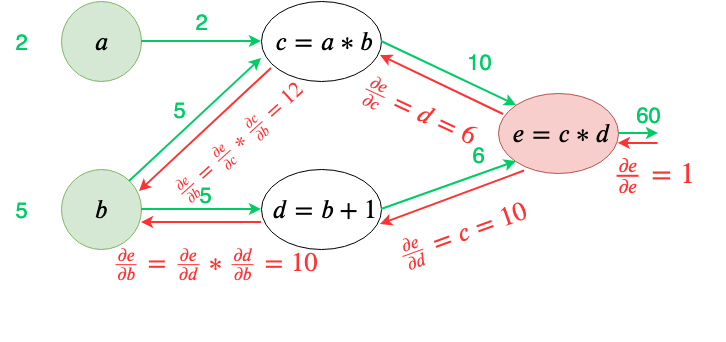

Чем быстрее ты умеешь вычислять свою функцию и чем гибче твои возможности для её определения, тем лучше. Сейчас, когда каждый фреймворк умеет использовать всю мощь видеокарт, первый критерий перестал играть значительную роль. Что нас действительно интересует, так это доступные возможности для определения потока вычислений. Все фреймворки здесь можно разделить на три крупные категории.

* **Фиксированные модули** Такой подход можно сравнить с конструктором Lego: пользователь комбинирует заранее определённые блоки в граф вычислений и запускает его. Прямой и обратный проходы уже зашиты в каждом таком блоке. Определение новых блоков гораздо сложнее использования готовых и требует совершенно иных знаний и умений. Расширяемость близка к нулю, однако если ваши идеи полностью реализуются в таком фреймворке, скорость разработки максимальна. Со скоростью работы, благодаря высокой оптимизированности заранее написанного кода, также не возникает проблем. Типичные представители: Caffe, Caffe2, CNTK, Kaldi, DL4J, Keras (как интерфейс).


* **Статический граф вычислений** Эти фреймворки уже можно сравнить с полимерной глиной: на этапе описания возможно создать граф вычислений произвольного размера и сложности, однако после запекания (компиляции) он станет твёрдым и монолитным. Доступными останутся всего два действия: запустить граф в прямом или обратном направлениях. Все такие фреймворки используют декларативный стиль программирования и напоминают функциональный язык или математическую нотацию. С одной стороны, этот подход комбинирует гибкость на этапе разработки и скорость в момент исполнения. С другой стороны, как и в функциональных языках, отладка становится настоящей головной болью, а модели, выходящие за рамки парадигмы, требуют либо титанических усилий, либо здоровенных костылей для реализации. Представители: Theano, TensorFlow, MXNet.

* **Динамический граф вычислений** Представьте теперь, что вы можете перестраивать статический граф перед каждым его запуском. Примерно это и происходит в данном классе фреймворков. Только графа как отдельной сущности здесь нет. Он, как и в императивных языках программирования, слишком сложен для явного построения и существует лишь в в момент исполнения. Точнее сказать, граф строится динамически каждый раз при прямом проходе для того, чтобы затем иметь возможность сделать проход обратный. Подобный подход даёт максимальную гибкость и расширяемость, позволяет использовать в вычислениях все возможности используемого языка программирования и не ограничивает пользователя вообще ничем. К этому классу фреймворков как раз и относятся Torch и PyTorch.


Начнём с NumPy части. Тензорные вычисления — основа PyTorch, каркас, вокруг которого наращивается вся остальная функциональность. К сожалению, нельзя сказать, что мощь и выразительность библиотеки в данном аспекте совпадает с таковой у NumPy. Во всём, что касается работы с тензорами, PyTorch руководствуется принципом максимальной простоты и прозрачности, предоставляя тонкую обёртку над вызовами BLAS.

## Тензоры

Тип данных, хранимых тензором, отражается в имени его конструктора. Конструктор без параметров вернёт специальное значение — тензор без размерности, который нельзя использовать ни в каких операциях.

In [ ]:
torch.tensor([])

tensor([])

In [ ]:
torch.FloatTensor()

tensor([])

In [ ]:
torch.HalfTensor      # 16 бит, с плавающей точкой
torch.FloatTensor     # 32 бита,  с плавающей точкой
torch.DoubleTensor    # 64 бита, с плавающей точкой

torch.ShortTensor     # 16 бит, целочисленный, знаковый
torch.IntTensor       # 32 бита, целочисленный, знаковый
torch.LongTensor      # 64 бита, целочисленный, знаковый

torch.CharTensor      # 8 бит, целочисленный, знаковый
torch.ByteTensor      # 8 бит, целочисленный, беззнаковый

torch.ByteTensor

In [ ]:
a = torch.IntTensor([1])
a.byte()

tensor([1], dtype=torch.uint8)

In [ ]:
a.float()

tensor([1.])

x.type_as(y) вернёт тензор значений из x того же типа, что и y.

Если передать конструктору тензора в качестве параметра список, будет построен тензор соответствующей размерности и с соответствующими данными.

In [ ]:
a = torch.IntTensor([[1, 2], [3, 4]])
a

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

Неправильно сформированные списки не допускаются так же, как и в NumPy

In [ ]:
torch.IntTensor([[1, 2], [3]])

ValueError: ignored

Другой возможный набор аргументов конструктора тензора — его размер. Количество аргументов при этом определяет размерность.



In [ ]:
torch.FloatTensor(1)

tensor([3.8109e-35])

Построенный таким методом тензор содержит мусор — случайные значения.

In [ ]:
torch.FloatTensor(3, 3)

tensor([[3.8108e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [4.4721e+21, 3.0104e+29, 7.1853e+22]])

## Индексирование

Поддерживается стандартное индексирование Python: обращение по индексу и срезы.

In [ ]:
a = torch.IntTensor([[1, 2, 3], [4, 5, 6]])
a

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [ ]:
a[0]

tensor([1, 2, 3], dtype=torch.int32)

In [ ]:
a[0][1]

tensor(2, dtype=torch.int32)

In [ ]:
a[1, 2]

tensor(6, dtype=torch.int32)

In [ ]:
a[:, 0]

tensor([1, 4], dtype=torch.int32)

In [ ]:
a[0, 1:3]

tensor([2, 3], dtype=torch.int32)


Также в качестве индексов могут выступать другие тензоры. Однако, возможности здесь всего две:


* Одномерный torch.LongTensor, индексирующий по нулевому измерению (по элементам в случае векторов и по строкам в случае матриц);
* Соразмерный torch.ByteTensor, содержащий только значения 0 или 1, служащий маской.

In [ ]:
a = torch.ByteTensor(3,4).random_()
a

tensor([[ 71, 110, 164, 200],
        [138,  50, 132,  46],
        [ 93, 149, 214, 177]], dtype=torch.uint8)

In [ ]:
a[torch.LongTensor([0, 2])]

tensor([[ 71, 110, 164, 200],
        [ 93, 149, 214, 177]], dtype=torch.uint8)

In [ ]:
a[a > 128]

tensor([164, 200, 138, 132, 149, 214, 177], dtype=torch.uint8)

Всю доступную информацию о тензоре помогут узнать функции x.dim(), x.size() и x.type(), а x.data_ptr() укажет на место в памяти, где находятся данные.

In [ ]:
a = torch.Tensor(3, 3)
a.dim()

2

In [ ]:
a.size()

torch.Size([3, 3])

In [ ]:
a.type()

'torch.FloatTensor'

In [ ]:
a.data_ptr()

105553344

## Операции над тензорами

Соглашение о именовании в PyTorch гласит, что любая функция вида xxx возвращает новый тензор, т.е. является immutable функцией. В противоположность ей функция вида xxx_ изменяет изначальный тензор, т.е. является mutable функцией. Последние ещё носят название inplace функций.

Почти для любой immutable функции в PyTorch существует её менее чистый собрат. Однако бывает и так, что функция существует лишь в каком-то одном варианте. По понятным причинам, функции, изменяющие размер тензора всегда являются immutable.

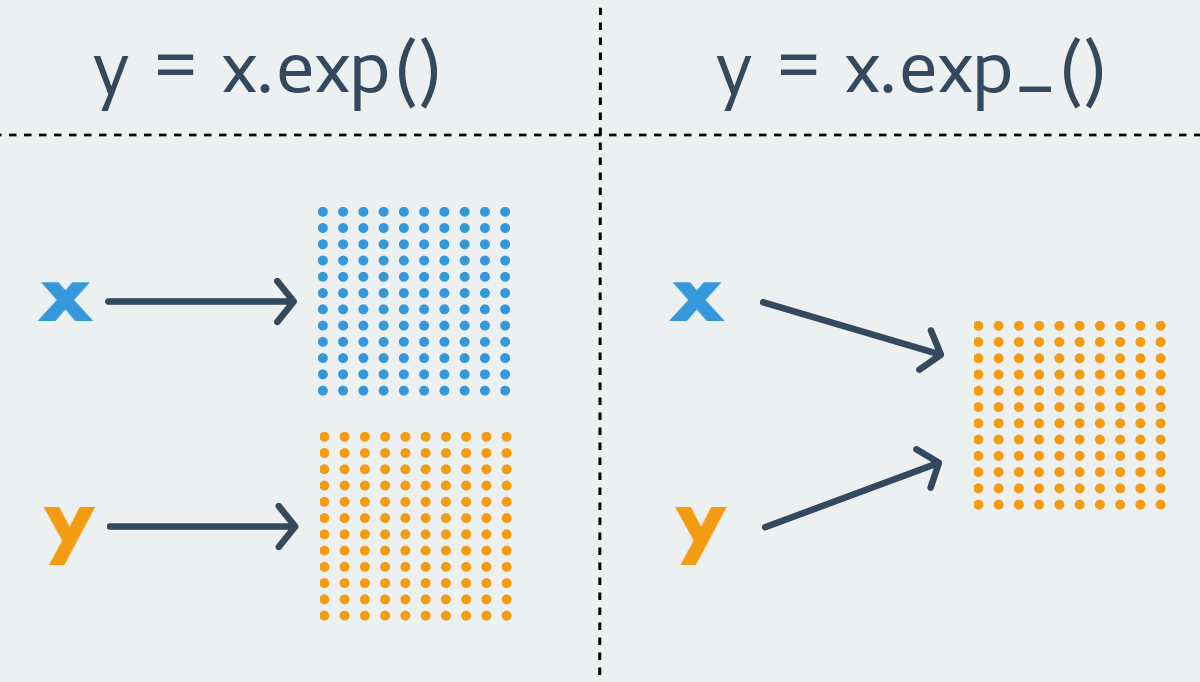

### Функции инициализации

ак правило, они используются для инициализации при создании новых тензоров заданного размера

In [ ]:
x = torch.FloatTensor(3, 4) # мусор
x.zero_()   

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Так как mutable функции возвращают ссылку на объект, удобнее записывать объявление и инициализацию в одну строчку.

In [ ]:
x = torch.FloatTensor(3, 4).zero_()

* x.zero_()

    Инициализирует тензор нулями. Не имеет immutable варианта.
* x.fill_(n)

    Заполняет тензор константой n. Аналогично не имеет immutable варианта.
* x.random_(from, to)

    Заполняет тензор сэмплами из дискретного (даже для вещественнозначных тензоров) равномерного распределения. 
    
    Если from и to не указаны, то они приравниваются нижней и верхней границам используемого типа данных соответственно.
* x.uniform_(from=0, to=1)

    Тоже равномерное распределение, но уже непрерывное и с более привычными границами по-умолчанию. Доступно только для вещественнозначных тензоров.
* x.normal_(mean=0, std=1)

    Нормальное распределение. Доступно только для вещественнозначных тензоров.
* x.bernoulli_(p=0.5)
    
    Распределение Бернулли. В качестве p может использоваться скаляр либо тензор той же размерности со значениями 0 <= p <= 1. Важно отличать эту версию от immutable варианта, так как он имеет другую семантику. Вызов y = x.bernoulli() эквивалентен y.bernoulli_(x), т.е. x здесь сам используется как тензор параметров распределения.
* torch.eye(n, m)

    Создаёт единичную матрицу n x m. Здесь по неясным для меня причинам не существует уже inplace варианта.

Доступны также экспоненциальное и геометрическое распределения, распределение Коши, логарифм нормального распределения и ещё несколько более сложных вариантов инициализации тензора. Не стесняйтесь смотреть в документацию!

### Математические операции

Самая часто используемая группа. Если операция здесь не изменяет размер и тип тензора, то у неё существует inplace вариант.


* Сложение.
    ```
    z = x.add(y) 
    z = torch.add(x, y)
    x.add_(y)
    ```

* Вычитаение.
    ```
    z = x.sub(y)
    z = torch.sub(x, y)
    x.sub_(y)
    ```
* Умножение.
    ```
    z = x.mul(y)
    z = torch.mul(x, y)
    x.mul_(y)
    ```
* Деление. Для целочисленных типов деление целочисленное.
    ```
    z = x.div(y)
    z = torch.div(x, y)
    x.div_(y)
    ```
* Экспонента.
    ```
    z = x.exp()
    z = torch.exp(x)
    x.exp_()
    ```
* Натуральный логарифм.
```
z = x.log()
z = torch.log(x)
x.log_()
```
* Натуральный логарифм от x + 1. Функция оптимизирована по точности вычислений для малых x.
```
z = x.log1p()
z = torch.log1p(x)
x.log1p_()
```

* Модуль.
```
z = x.abs()
z = torch.abs(x)
x.abs_()
```

Естественно, присутствуют все основные тригонометрические операции в том виде, в каком вы ожидаете их увидеть. Перейдём теперь к менее тривиальным функциям.

* Транспонирование. Несмотря на то, что размер тензора меняется, существует inplace вариант функции, так как размер данных в памяти остаётся тем же.
```
z = x.t()
z = torch.t(x)
x.t_()
```
* Матричное умножение.
```
z = x.mm(y)
z = torch.mm(x, y)
```
* Умножение матрицы на вектор.
```
z = x.mv(v)
z = torch.mv(x, v)
```
* Скалярное умножение тензоров.
```
z = x.dot(y)
z = torch.dot(x, y)
```
* Перемножает матрицы целыми батчами.
```
bz = bx.bmm(by)
bz = torch.bmm(bx, by)
```



In [ ]:
bx = torch.randn(10, 3, 4)
by = torch.randn(10, 4, 5)
bz = bx.bmm(by)
bz.size()

torch.Size([10, 3, 5])

Существуют также полные аналоги BLAS функций со сложными сигнатурами, такие как addbmm, addmm, addmv, addr, baddbmm, btrifact, btrisolve, eig, gels и множество других.

Операции редукции похожи друг на друга по сигнатуре. Почти все они своим последним необязательным аргументом принимают dim — размерность, по которой редукция проводится. Если аргумент не задан, операция действует на весь тензор целиком.

* Выборочное среднее. Определена только для вещественнозначных тензоров.
```
s = x.mean(dim)
s = torch.mean(x, dim)
```
* Выборочное стандартное отклонение. Определена только для вещественнозначных тензоров.
```
s = x.std(dim)
s = torch.std(x, dim)
```

* Выборочная дисперсия. Определена только для вещественнозначных тензоров.
```
s = x.var(dim)
s = torch.var(x, dim)
```

* Медиана.
```
s = x.median(dim)
s = torch.median(x, dim)
```

* Сумма.
```
s = x.sum(dim)
s = torch.sum(x, dim)
```

* Произведение.
```
s = x.prod(dim)
s = torch.prod(x, dim)
```

* Максимум.
```
s = x.max(dim)
s = torch.max(x, dim)
```

* Минимум.
```
s = x.min(dim)
s = torch.min(x, dim)
```

Всевозможные операции сравнения (eq, ne, gt, lt, ge, le) также определены и возвращают в качестве результата своей работы маску типа ByteTensor .


Операторы +, +=, -, -=, *, *=, /, /=, @ работают ровно так, как вы и ожидаете, вызывая соответствующие описанные выше функции. Однако из-за сложности и не полной очевидности API, я не рекомендую пользоваться операторами, а использовать вместо этого явный вызов нужных функций. По крайней мере не стоит смешивать два стиля, это позволит избежать ошибок навроде x += x.mul_(2).


У PyTorch в запасе ещё много интересных функций вроде сортировки или поэлементного применения функции, но все они крайне редко используются в глубоком обучении. Если же вы захотите использовать PyTorch в качестве библиотеки тензорных вычислений, не забудьте перед этим заглянуть в документацию.

Функции torch.from_numpy(n) и x.numpy() могут быть использованы, чтобы конвертировать тензоры одной библиотеки в тензоры другой. Тензоры при этом используют одно и то же внутренне хранилище, копирования данных не происходит.

In [ ]:
a = np.random.rand(3, 3)
a

array([[0.46481025, 0.67118701, 0.61074249],
       [0.34681832, 0.26676462, 0.78160216],
       [0.09118843, 0.72726105, 0.63172995]])

In [ ]:
b = torch.from_numpy(a)
b

tensor([[0.4648, 0.6712, 0.6107],
        [0.3468, 0.2668, 0.7816],
        [0.0912, 0.7273, 0.6317]], dtype=torch.float64)

In [ ]:
b.sub_(b)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

Реализовать прямой проход для произвольной функции на PyTorch ничуть не сложнее, чем сделать это с помощью NumPy. Нужно лишь свыкнуться с inplace операциями и запомнить имена основных функций. Для примера, линейный слой с функцией активации softmax:

In [ ]:
def LinearSoftmax(x, w, b):
    s = x.mm(w).add_(b)
    s.exp_()
    s.div_(s.sum(1))

    return s

## CUDA

Здесь всё просто: тензоры могут жить либо "на процессоре", либо "на видеокарте". Правда, они весьма привередливы и живут только на видеокартах от Nvidia, причём не на самых старых. По умолчанию тензор создаётся на CPU.

In [ ]:
x = torch.FloatTensor(1024, 1024).uniform_()

In [ ]:
x.is_cuda

False

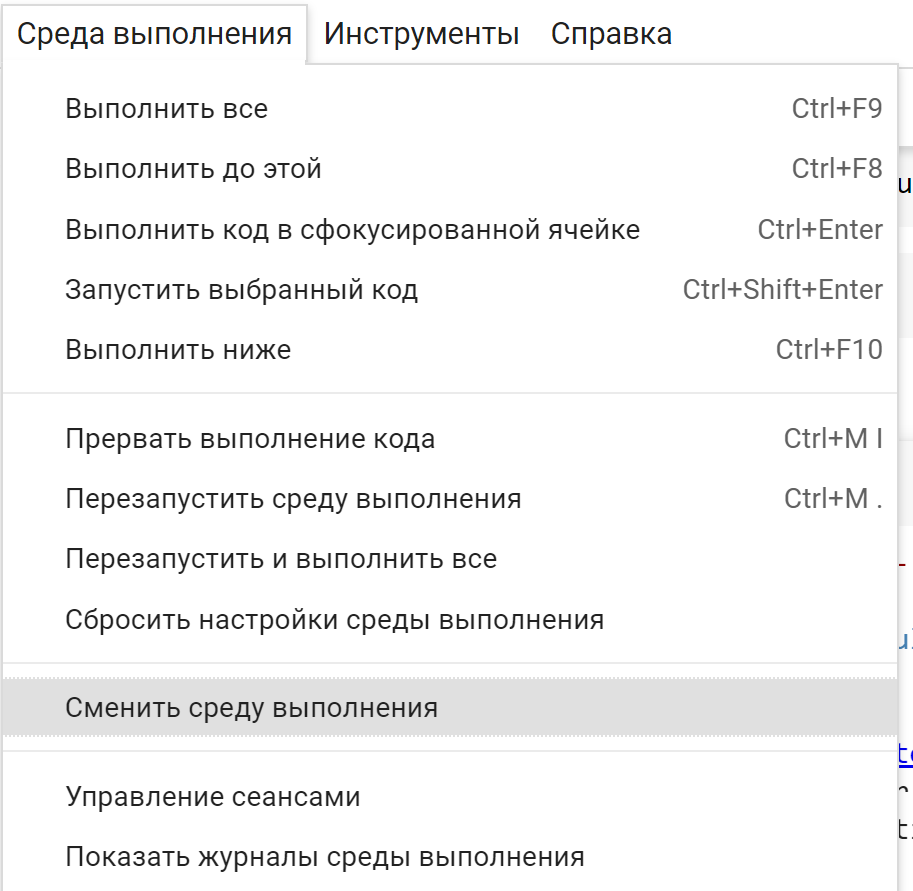

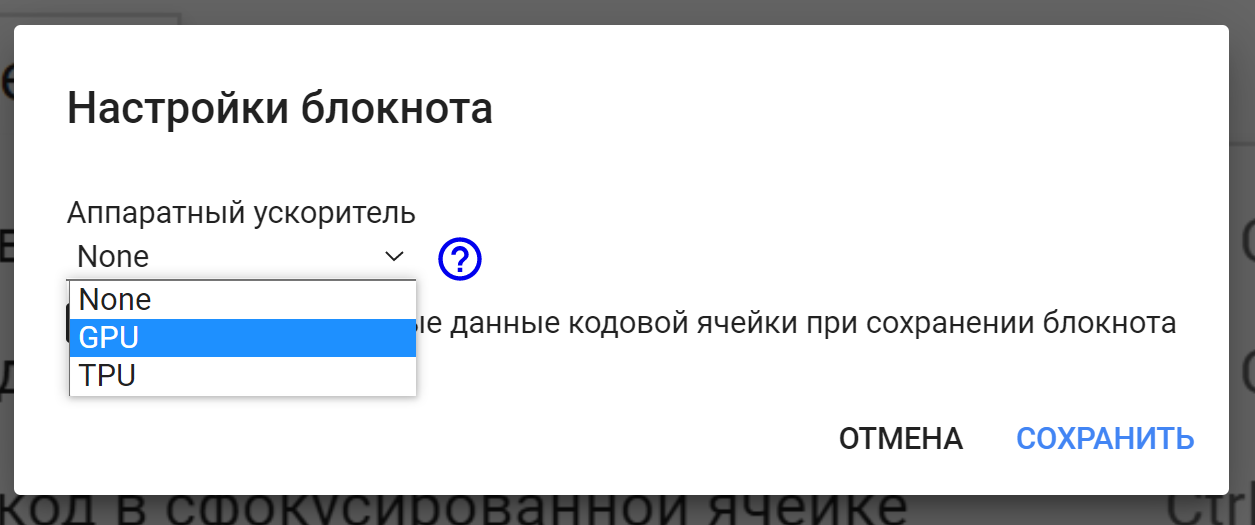

In [ ]:
x = x.cuda()

In [ ]:
x.is_cuda # На самом деле x.cuda() возвращает копию тензора, а не перемещает его.

True

Когда исчезнут все ссылки на тензор, находящийся в видеопамяти, PyTorch не удалит его моментально. Вместо этого при следующем выделении он либо переиспользует этот участок видеопамяти, либо очистит её.

Если у вас несколько видеокарт, функция x.cuda(device=None) с радостью примет в качестве опционального аргумента номер видеокарты, куда стоит положить тензор, а функция x.get_device() покажет на каком устройстве тензор x находится. Функция x.cpu() скопирует тензор из видеокарты "на процессор".

Естественно, мы не можем производить никакие операции с тензорами, находящимеся на разных устройствах.

Вот, например, как можно перемножить два тензора на видеокарте и вернуть результат обратно в оперативную память:

In [ ]:
%time
import torch
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul_(b.cuda()).cpu()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# a.to(device)
# a.cpu()

И всё это доступно прямо из интерпретатора! Представьте аналогичный код на TensorFlow, где вам придётся создать граф, сессию, скомпилировать граф, инициализировать переменные и запустить граф на сессии. С помощью PyTorch я могу даже отсортировать тензор на видеокарте одной строчкой кода!


Тензоры можно не только копировать на видеокарту, но и создавать их прямо на ней. Для этого используется модуль torch.cuda.

Контекстный менеджер torch.cuda.device(device) позволяет создавать все определённые внутри него тензоры на указанной видеокарте. Результаты операций над тензорами с других устройств останутся там, где и должны быть. Переданное в x.cuda(device=None) значение приоритетнее, чем то, которое диктует контекстный менеджер.



In [ ]:
x = torch.cuda.FloatTensor(1)
y = torch.FloatTensor(1).cuda()

with torch.cuda.device(0):
    a = torch.cuda.FloatTensor(1)
    b = torch.FloatTensor(1).cuda()
    c = a + b
    z = x + y
    d = torch.FloatTensor(1).cuda(0)

    print(d)

tensor([0.], device='cuda:0')


## Автоматическое дифференцирование

Механизм автоматического дифференцирования, заключённый в модуле torch.autograd, является хоть и не главным, но, без сомнения, важнейшим компонентом библиотеки, без которого та потеряла бы всякий смысл.


Вычисление градиента функции в заданной точке — центральная операция методов оптимизации, на которых, в свою очередь, держится всё глубокое обучение. Обучение здесь — синоним оптимизации. Существует три основных способа вычислить градиент функции в точке:

* Численно методом конечных разностей;
* Символьно;
* Использовать технику автоматического дифференцирования.

Первым методом пользуются лишь для проверки результатов из-за его низкой точности. Символьное вычисление производной эквивалентно тому, что вы делаете вручную, используя бумагу и карандаш, и заключается в применении списка правил к дереву символов. 

Библиотеки вроде Caffe и CNTK используют заранее предпосчитанную производную функции в символьном виде. Theano и TensorFlow используют комбинацию методов 2 и 3.

Автоматическое дифференцирование (AD) — достаточно простая и весьма очевидная техника вычисления градиента функции. Если вы, не используя интернет, попытаетесь решить задачу дифференцирования функции в заданной точке, вы совершенно точно придёте к AD.

Вот как AD работает. Любую из интересующих нас функций можно выразить как композицию некоторых элементарных функций, производные которых нам известны. Затем, используя правило дифференцирования сложной функции, мы можем подниматься всё выше и выше, пока не придём к искомой производной. Например, рассмотрим функцию двух переменных

$$f(x_1, x_2) = x_1 x_2 + x_1^2$$

Переобозначим

$w_1 = x_1$, 

$w_2 = x_2$, 

$w_3 = w_1w_2$, 

$w_4 = w_1^2$, 

$w_5 = w_3 + w_4$

Каждая из получившихся функций является элементарной функцией — мы можем с лёгкостью вычислить её производную.


Допустим, нас интересует

$$\dfrac{\partial{f(x_1^*, x_2^*)}}{\partial{x_1}}$$

По правилу дифференцирования сложной функции можем записать:

$$\dfrac{\partial{f}}{\partial{x_1}} = \dfrac{\partial{f}}{\partial{w_5}} \dfrac{\partial{w_5}}{\partial{x_1}} = \dfrac{\partial{f}}{\partial{w_5}} \Big[ \dfrac{\partial{w_5}}{\partial{w_4}} \dfrac{\partial{w_4}}{\partial{x_1}} + \dfrac{\partial{w_5}}{\partial{w_3}} \dfrac{\partial{w_3}}{\partial{x_1}} \Big] = \cdots$$



Все компоненты этого уравнения — производные элементарных функций и начальные значения — нам известны. Осталось лишь подставить их и вычислить результат. Однако подстановку мы будем совершать не в произвольном порядке, а начнём с начала — самых вложенных элементов.

$$\dfrac{\partial{w_1(x_1^*, x_2^*)}}{\partial{x_1}} = 1$$

$$\dfrac{\partial{w_2(x_1^*, x_2^*)}}{\partial{x_1}} = 0$$

$$\dfrac{\partial{w_3(x_1^*, x_2^*)}}{\partial{x_1}} = \dfrac{\partial{w_1(x_1^*, x_2^*)}}{\partial{x_1}} w_2 + \dfrac{\partial{w_2(x_1^*, x_2^*)}}{\partial{x_1}} w_1 = x_2^*$$

$$\dfrac{\partial{w_4(x_1^*, x_2^*)}}{\partial{x_1}} = 2 w_1\dfrac{\partial{w_1(x_1^*, x_2^*)}}{\partial{x_1}} = 2 x_1^*$$

$$\dfrac{\partial{w_5(x_1^*, x_2^*)}}{\partial{x_1}} = \dfrac{\partial{w_3(x_1^*, x_2^*)}}{\partial{x_1}} + \dfrac{\partial{w_4(x_1^*, x_2^*)}}{\partial{x_1}} = x_2^* + 2 x_1^*$$

$$\dfrac{\partial{f(x_1^*, x_2^*)}}{\partial{x_1}} = \dfrac{\partial{f(x_1^*, x_2^*)}}{\partial{w_5}} \dfrac{\partial{w_5(x_1^*, x_2^*)}}{\partial{x_1}} = x_2^* + 2 x_1^*$$

Вот так за один проход мы можем вычислить производную функции в заданной точке. И необходимо для этого ровно такое же количество операций, как и для вычисления самой функции. Обратите внимание, что икс со звёздочкой — не символ, а некоторое числовое значение. Поэтому на каждом шаге рассмотренного алгоритма мы сохраняем не символьное выражение, а одно единственное число — текущее значение производной.

Чтобы лучше понять AD, мы можем реализовать простейший его вариант всего в 20 строчек кода на чистом Python! Будем вычислять значение функции и её производную в одной и той же точке одновременно. Первым делом запомним значение переменной в точке и её производную.

In [ ]:
class Varaible:
    def __init__(self, value, derivative):
        self.value = value
        self.derivative = derivative

    '''
    При сложении двух переменных мы сконструируем новую переменную, значение которой
    будет равняться сумме исходных переменных, а производная будет вычисляться по 
    правилу вычисления производной суммы двух функций.
    '''
    def __add__(self, other):
        return Varaible(
            self.value + other.value,
            self.derivative + other.derivative
        )
    
    # Аналогично для умножения и возведения в степень
    def __mul__(self, other):
        return Varaible(
            self.value * other.value,
            self.derivative * other.value + self.value * other.derivative
        )

    def __pow__(self, other):
        return Varaible(
            self.value ** other,
            other * self.value ** (other - 1)
        )

Теперь мы с лёгкостью можем одновременно вычислить и значение нашей функции и её частную производную по переменной x1 за один проход.



In [ ]:
def f(x1, x2):
    vx1 = Varaible(x1, 1)
    vx2 = Varaible(x2, 0)
    vf = vx1 * vx2 + vx1 ** 2
    return vf.value, vf.derivative

print(f(2, 4))

(12, 8)


Ровно таким же поведением обладает класс Variable из модуля torch.autograd. Конечно, в отличии от нашей наивной реализации, он хорошо оптимизирован, поддерживает тензоры PyTorch и все возможные с ними дифференцируемые операции. К тому же, он вычисляет производную не по одному аргументу за раз, а по всем сразу. Давайте рассмотрим пример.

In [ ]:
from torch.autograd import Variable

In [ ]:
x = torch.Tensor(3, 3).uniform_()
w = torch.Tensor(3).uniform_() 
b = torch.Tensor(3).uniform_()
print(x)
print(w)
x = Variable(x, requires_grad=True)
w = Variable(w)
b = Variable(b)

y = torch.mv(x, w).add_(b)
y

tensor([[0.5078, 0.3907, 0.7539],
        [0.7797, 0.0222, 0.8737],
        [0.5656, 0.9682, 0.6760]])
tensor([0.9981, 0.8403, 0.5644])


tensor([1.9686, 1.7062, 1.9716], grad_fn=<AddBackward0>)

In [ ]:
loss = y.sum()
loss

tensor(5.6464, grad_fn=<SumBackward0>)

In [ ]:
loss.backward()

In [ ]:
x.grad

tensor([[0.9981, 0.8403, 0.5644],
        [0.9981, 0.8403, 0.5644],
        [0.9981, 0.8403, 0.5644]])

И снова нам никак не нужно изменять наш код для вычислений: достаточно лишь обернуть тензоры в Variable и он сам позаботится о сохранении всех методов и свойств, а также добавит парочку новых. x.backward() выполнит обратный проход и посчитает производную по всем переменным, при создании которых мы указали requires_grad=True. Производная при этом запишется в свойство x.grad. Получить же свой тензор обратно мы можем используя свойство x.data.

Свойство x.requires_grad покажет, нуждается ли узел графа в вычислении градиента. Правило такое: если хоть у одного дочернего узла это свойство установлено, оно будет установлено и у родителя.

### Пример линейной регрессии

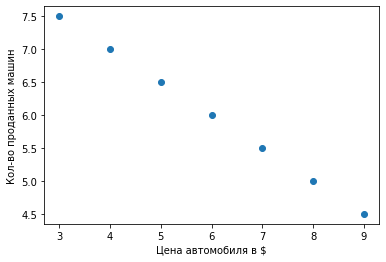

In [ ]:
'''
Например, у нас есть автомобильная компания. Если цена автомобиля низкая, мы продаем больше автомобилей, выше - меньше. 
Вопрос в том, каким будет количество проданных автомобилей, если цена автомобиля равна 100.
'''
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# визуализируем данные
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Цена автомобиля в $")
plt.ylabel("Кол-во проданных машин")
plt.show()

epoch 0, loss 75.6022720336914
epoch 50, loss 5.400559902191162
epoch 100, loss 3.649383068084717
epoch 150, loss 2.4660418033599854
epoch 200, loss 1.666407823562622
epoch 250, loss 1.126060962677002
epoch 300, loss 0.7609265446662903
epoch 350, loss 0.514190137386322
epoch 400, loss 0.3474596440792084
epoch 450, loss 0.2347930371761322
epoch 500, loss 0.15865935385227203
epoch 550, loss 0.10721290856599808
epoch 600, loss 0.0724480152130127
epoch 650, loss 0.048956047743558884
epoch 700, loss 0.03308169171214104
epoch 750, loss 0.022354764863848686
epoch 800, loss 0.015106206759810448
epoch 850, loss 0.010207891464233398
epoch 900, loss 0.00689795333892107
epoch 950, loss 0.004661101847887039
epoch 1000, loss 0.0031497490126639605


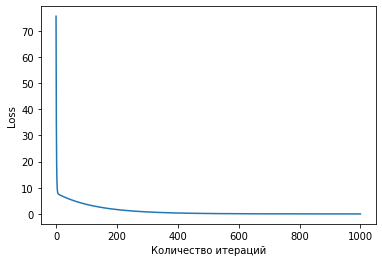

In [ ]:
import torch      
from torch.autograd import Variable     
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super позволяеть наследовать методы модуля nn 
        super(LinearRegression,self).__init__()
        # создаем линейный слой
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# определяем модель
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim)

# mse потери
mse = nn.MSELoss()

# скорость спуска
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate) # сразу используем sgd

# обучаем
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    '''
    В PyTorch нам нужно установить градиенты на ноль,
    прежде чем начинать обратное распространение, поскольку PyTorch 
    накапливает градиенты при последующих обратных проходах.
    '''
    optimizer.zero_grad() 
    
    # прогнозы
    results = model(car_price_tensor)
    # потери
    loss = mse(results, number_of_car_sell_tensor)
    # вычисляем потери
    loss.backward()
    # делаем шаг
    optimizer.step() # в numpy бы сделали что-то типа param = param - lr * param.grad / batch_size
    # сохраняем loss для визуализации
    loss_list.append(loss.item())
    # отображаем
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.item()))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Количество итераций")
plt.ylabel("Loss")
plt.show()

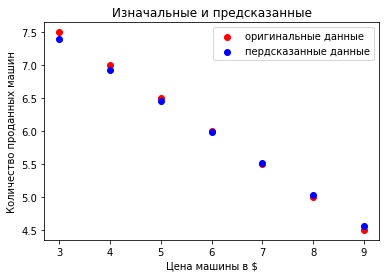

In [ ]:
# предсказываем 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label = "оригинальные данные",color ="red")
plt.scatter(car_prices_array, predicted, label = "пердсказанные данные",color ="blue")

# предсказать количество продаж при цене в 10$
# predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
# отобразить 
# plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Цена машины в $")
plt.ylabel("Количество проданных машин")
plt.title("Изначальные и предсказанные")
plt.show()